# PROBABILITY

The Question is:

To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [40]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [41]:
data=pd.read_csv(r'C:\Users\SREELAKSHMI JAYAN\Downloads/mushrooms.csv')

In [42]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [43]:
#basic details of the dataset
data.shape

(8124, 23)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [45]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [46]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [47]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [48]:
#Checking null values
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null values are present in this dataset.

# Data Visualization

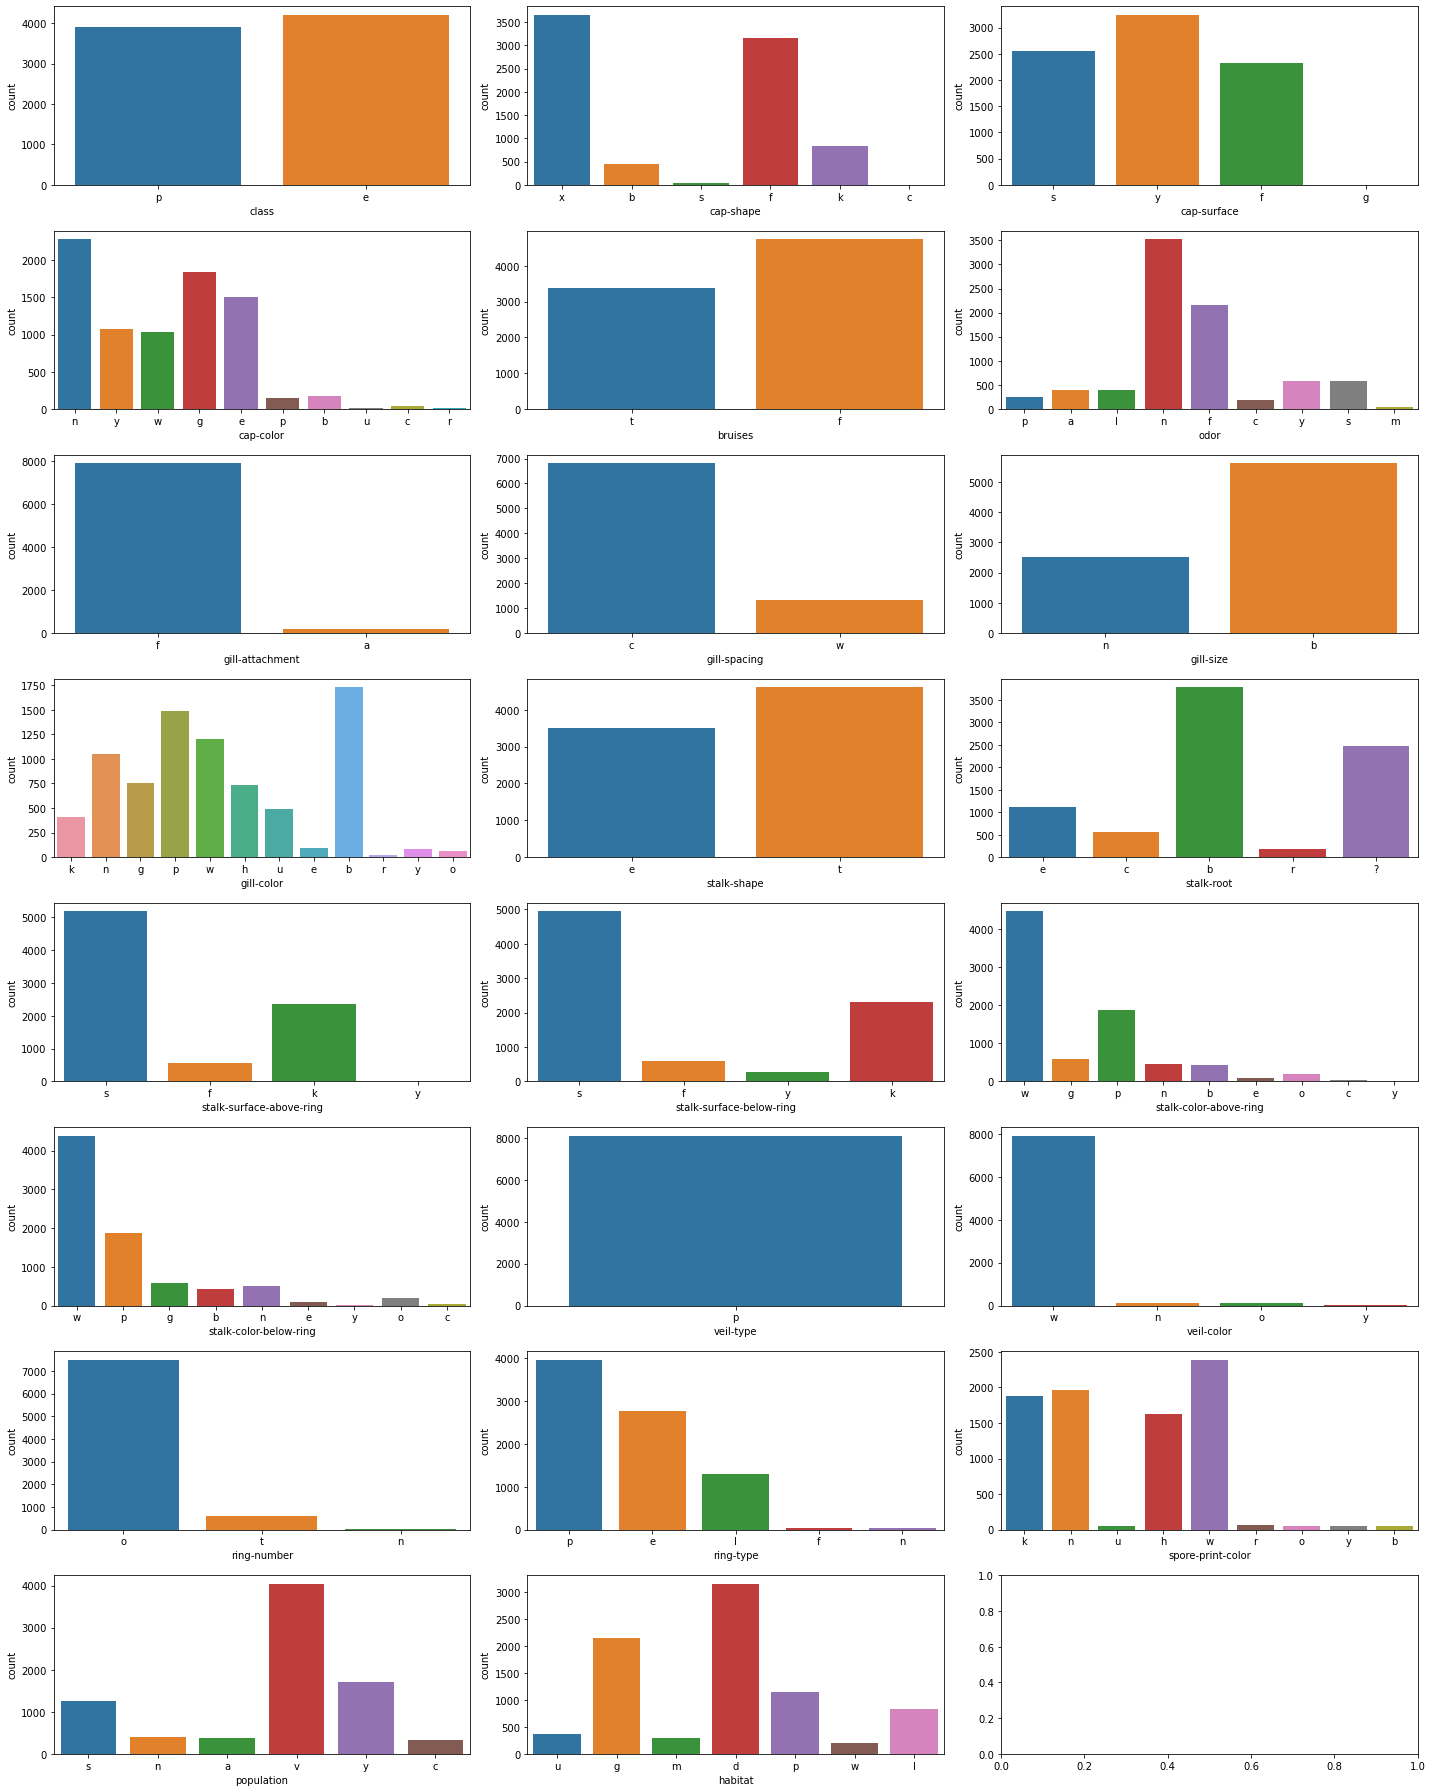

In [49]:
fig, axes=plt.subplots(8,3, figsize=(20,25))
for i,j in enumerate(data.columns):
  ax=axes[int(i/3), i%3]
  sns.countplot(data[j],ax=ax)
  plt.tight_layout()

# Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
a = ['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in np.arange(len(a)):    
    data[a[i]] = label_en.fit_transform(data[a[i]])

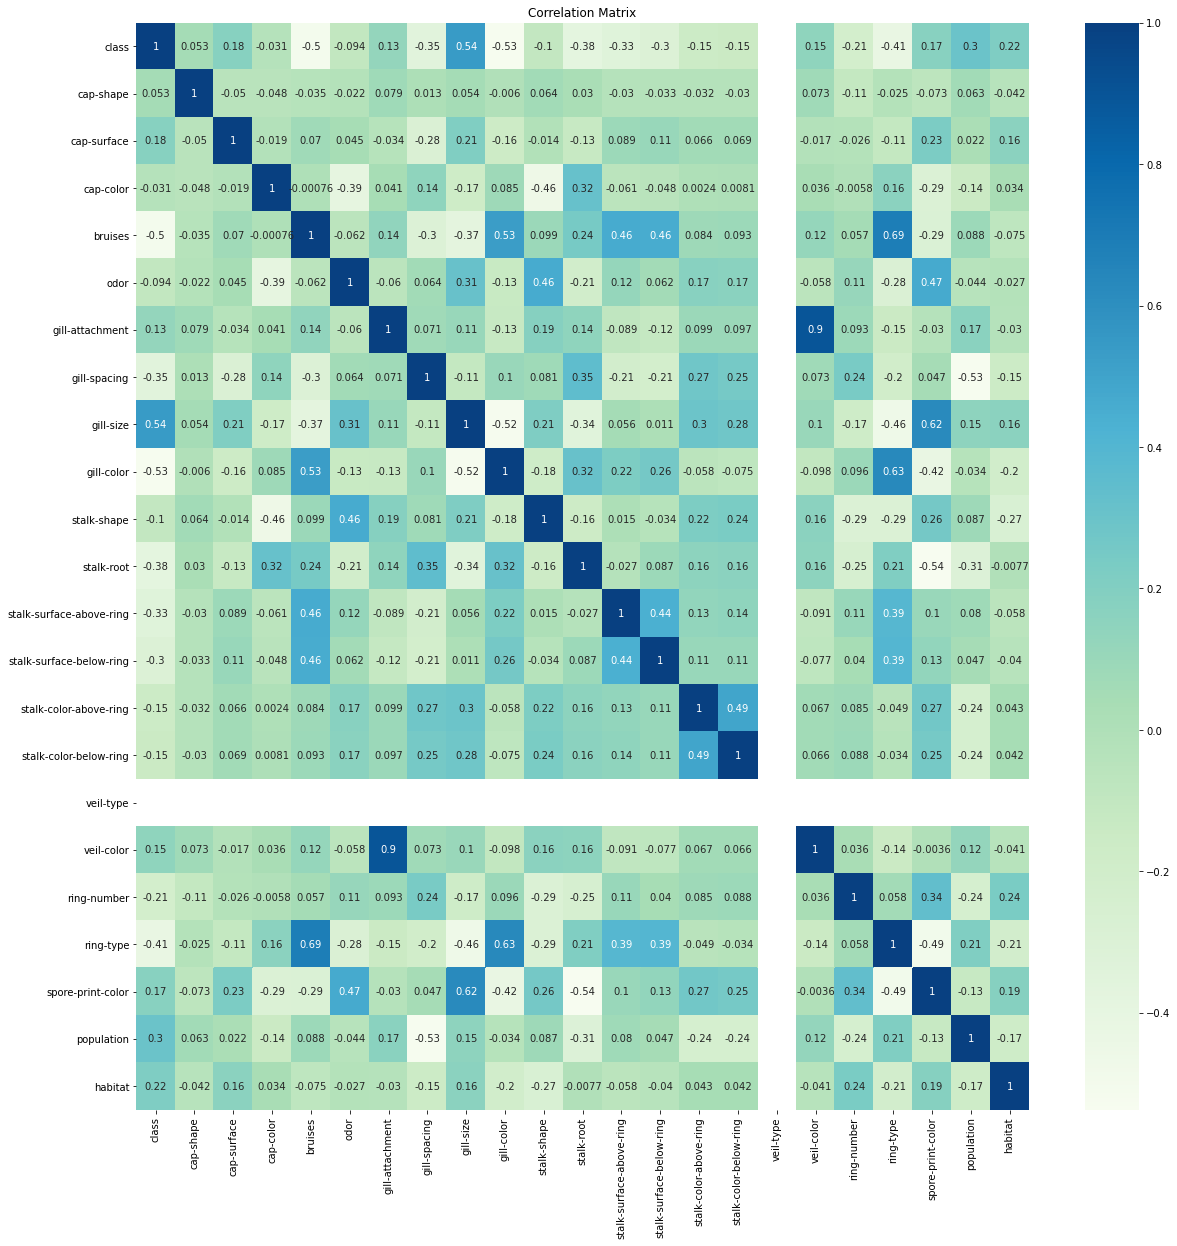

In [51]:
plt.figure(figsize=(20,20))
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='GnBu')
plt.title('Correlation Matrix')
plt.show()

# Splitting

In [52]:
X = data.drop('class', axis = 1)
y= data['class']
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

# Building Necessary Models

In [53]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train.values.ravel()) 
y_pred = logit_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report, f1_score
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9476923076923077
f1_score :  0.9458253664754621
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



[0.9981538461538462, 0.9963076923076923, 0.9963076923076923, 0.9969230769230769, 0.9956923076923077, 0.9950769230769231, 0.9950769230769231, 0.9950769230769231, 0.9956923076923077, 0.9938461538461538, 0.9944615384615385, 0.9938461538461538]


Text(0, 0.5, 'accuracy')

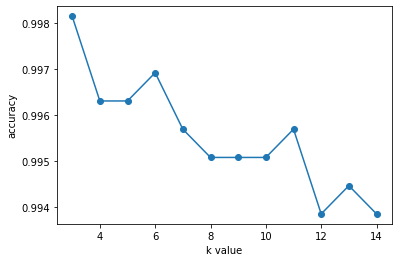

In [55]:
#KNN
from  sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15 )
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    classifier.fit(X_train, y_train.values.ravel())
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)
    
print(acc_values)   

plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [56]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
y_pred=dec_tree.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy : 1.0
f1_score :  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [57]:
#SVM LINEAR
from sklearn.svm import SVC
l_svm=SVC(kernel='linear')
l_svm.fit(X_train,y_train.values.ravel())
y_pred=l_svm.predict(X_test)

print("Accuracy :",accuracy_score(y_test,y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy : 0.9729230769230769
f1_score :  0.9715762273901808
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       843
           1       0.98      0.96      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



In [58]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)

print('Accuracy:', accuracy_score( y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
f1_score :  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [59]:
#Gradient Boosting
y = pd.DataFrame(y)
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

print('Accuracy:', accuracy_score( y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
f1_score :  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [60]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy:', accuracy_score( y_test, y_pred))
print('f1_score : ', f1_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9218461538461539
f1_score :  0.9196710942441493
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

